<IPython.core.display.Javascript object>


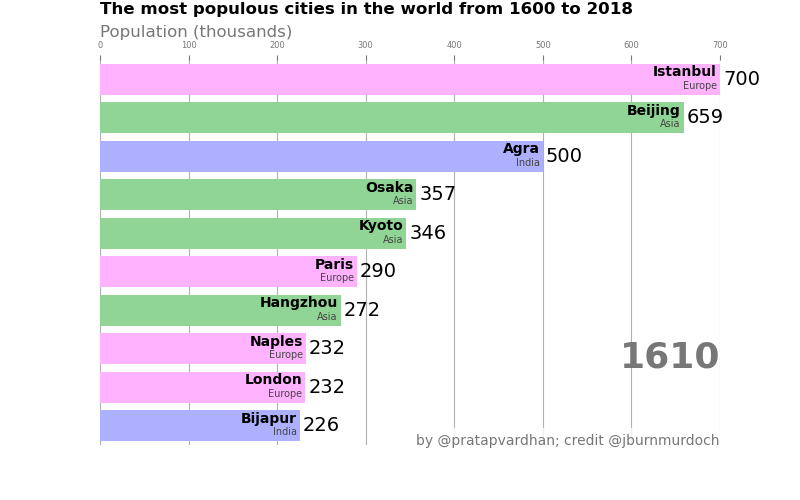

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
%matplotlib notebook

df = pd.read_csv('city_populations.csv',
                 usecols=['name', 'group', 'year', 'value'])
  
colors = dict(zip(['India','Europe','Asia',
                   'Latin America','Middle East',
                   'North America','Africa'],
                    ['#adb0ff', '#ffb3ff', '#90d595',
                     '#e48381', '#aafbff', '#f7bb5f', 
                     '#eafb50']))
  
group_lk = df.set_index('name')['group'].to_dict()
  
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value',
                                              ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'],
            color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
      
    for i, (value, name) in enumerate(zip(dff['value'],
                                          dff['name'])):
        ax.text(value-dx, i,     name,           
                size=10, weight=600,
                ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name],
                size=7, color='#444444', 
                ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}', 
                size=14, ha='left',  va='center')
          
    # polished styles
    ax.text(1, 0.2, year, transform=ax.transAxes, 
            color='#777777', size=26, ha='right',
            weight=800)
    ax.text(0, 1.06, 'Population (thousands)',
            transform=ax.transAxes, size=12,
            color='#777777')
      
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=6)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world from 1600 to 2018',
            transform=ax.transAxes, size=12, weight=600, ha='left')
      
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', 
            transform=ax.transAxes, ha='right', color='#777777', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
animator = FuncAnimation(fig, draw_barchart, 
                         frames = range(1600, 2019))
plt.show()